### 3-1. 데이터셋 준비하기

In [2]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

In [3]:
print(diabetes.data.shape, diabetes.target.shape)

(442, 10) (442,)


In [4]:
diabetes.data[0:3]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632783, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567061, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286377, -0.02593034]])

In [5]:
diabetes.target[:3]

array([151.,  75., 141.])

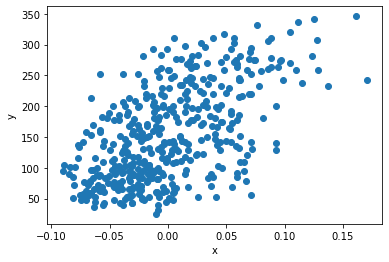

In [8]:
import matplotlib.pyplot as plt
plt.scatter(diabetes.data[:, 2], diabetes.target)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [9]:
x = diabetes.data[:, 2]
y = diabetes.target

### 3-2. 경사하강법으로 학습시키기
#### 가중치 변화율로 가중치 업데이트 하기

In [10]:
w=1.0
b=1.0
y_hat = x[0] * w + b # 예측값
print(y_hat)

1.0616962065186886


In [11]:
print(y[0])

151.0


In [12]:
w_inc = w + 0.1
y_hat_inc = x[0] * w_inc + b
print(y_hat_inc)

1.0678658271705574


In [13]:
w_rate = (y_hat_inc - y_hat)/(w_inc - w) # w의 변화율
print(w_rate)

0.061696206518688734


In [14]:
w_new = w + w_rate
print(w_new)

1.0616962065186888


#### 절편 변화율로 절편 업데이트 하기

In [15]:
b_inc = b + 0.1
y_hat_inc = x[0]*w + b_inc
print(y_hat_inc)

1.1616962065186887


In [17]:
b_rate = (y_hat_inc - y_hat)/(b_inc - b)
print(b_rate) 
# b의 변화율은 1

1.0


#### 오차 역전파로 가중치와 절편 업데이트 하기
오차에 변화율을 곱하는 방법으로 업데이트 하기

In [18]:
err = y[0] - y_hat
w_new = w + w_rate * err
b_new = b + 1 * err
print(w_new, b_new)

10.250624555904514 150.9383037934813


In [19]:
y_hat = x[1] * w_new + b_new
err = y[1] - y_hat
w_new = w_new + w_rate * err
b_new = b_new + 1 * err
print(w_new, b_new)

5.598072747522661 75.52764127612664


위의 과정을 전체 샘플에 대해 반복하기

In [20]:
for x_i, y_i in zip(x, y):
    y_hat = x_i * w + b
    err = y_i - y_hat
    w_rate = x_i # 앞에서 가중치의 변화율이 x[i]인 것을 확인함
    w = w + w_rate # 변화율 더해주기
    b = b + 1 * err
print(w, b)

0.9999999999996445 57.07836372783126


직선 그래프를 그리려면 시작점과 종료점의 x좌표와 y좌표를 plot() 함수에 전달하면 됨

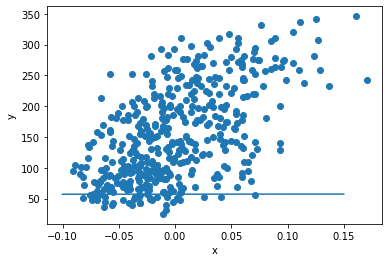

In [25]:
plt.scatter(x, y)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()
# 뭐지... 결과가 왜이렇지...? 책이랑 다르긴 한데... 계산해보면 맞는 것 같긴함...

여러 에포크 반복하기

In [29]:
for i in range(100):
    for x_i, y_i in zip(x, y):
        y_hat = x_i * w + b
        err = y_i - y_hat
        w_rate = x_i
        w = w + w_rate * err
        b = b + 1 * err
print(w, b)

913.5973364345905 123.39414383177204


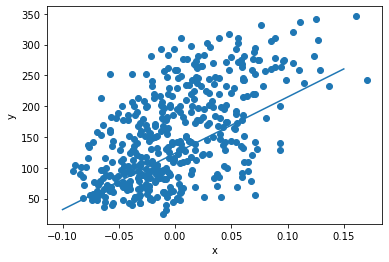

In [28]:
plt.scatter(x, y)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

모델로 예측하기

In [31]:
x_new = 0.18
y_pred = x_new * w + b
print(y_pred)

287.8416643899983


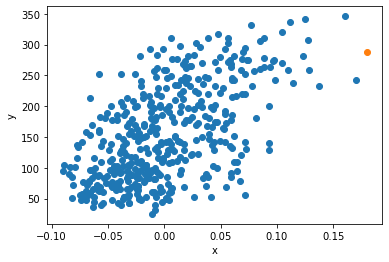

In [32]:
plt.scatter(x, y)
plt.scatter(x_new, y_pred)
plt.xlabel('x')
plt.ylabel('y')
plt.show()
# 나름 잘 예측한 것 같군!!

### 3-3. 손실함수와 경사하강법